# Overview 
In this assignment you will explore some basic computations on data and build a nearest neighbor classifier.  

For this assignment we will use the functionality of Pandas (https://pandas.pydata.org/), Matplotlib (https://matplotlib.org/), and Numpy (http://www.numpy.org/). You may also find Seaborn (https://seaborn.pydata.org/) useful for some data visualization.

If you are asked to **implement** a particular functionality, you should **not** use an existing implementation from the libraries above (or some other library that you may find). When in doubt, please ask. 

Before you start, make sure you have installed all those packages in your local Jupyter instance

## Read *all* cells carefully and answer all parts (both text and missing code)

You will complete all the code marked `TODO` and answer descriptive/derivation questions 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Question 0: Getting real data
In this assignment you are going to use data from the UCI Machine Learning repository ( https://archive.ics.uci.edu/ml/index.php ). In particular, you are going to use the famous Iris dataset: https://archive.ics.uci.edu/ml/datasets/Iris

In [2]:
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names = data_names)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


This data has 150 samples. Each sample has 4 features that are given as ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] and one label. 

The label has three possible values ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [3]:
data.shape

(150, 5)

*Note that the arrangement of data samples is different from the notation we used in the class. In the class, data samples are given as column vectors. Here data samples are given as row vectors.*

`data` has 150 sample vectors, each of length 4 and stored as rows of `data`. 

In [4]:
data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We can visualize pair-wise relations among 4 features in the data using scatterplot of all pairs of features and color the points by class label 

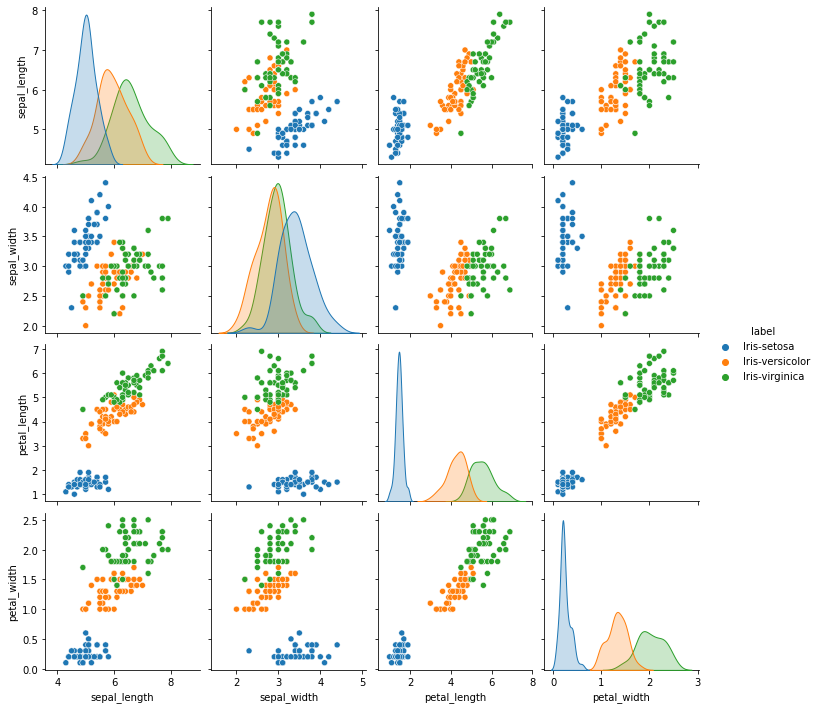

In [5]:
sb.pairplot(data, hue = 'label')

## Question 1: Basic data analysis

## Question 1a: Counting and simple statistics

1. Calculate and print the mean value of each of the four features in the entire dataset

1. Count and print the number of samples that belong to each of the three categories

1. Calculate and print the mean of each feature for each each label as a $3\times 4$ table.

In [6]:
data_np = data.to_numpy()
X = data_np[:, :4] # All rows, columns 0 to 3 (features)
Y = data_np[:, 4] # All rows, column 4 (category)

sepal_length = X[:, 0]
sepal_width = X[:, 1]
petal_length = X[:, 2]
petal_width = X[:, 3]

# 1. print mean value of 4 features 
print("#1:")
print("Mean of sepal_length: " + str(format(np.mean(sepal_length), ".4f")))
print("Mean of sepal_width: " + str(format(np.mean(sepal_width), ".4f")))
print("Mean of petal_length: " + str(format(np.mean(petal_length), ".4f")))
print("Mean of petal_width: " + str(format(np.mean(petal_width), ".4f") + "\n"))

# 2. print number of samples per category
isSetosa = (Y == "Iris-setosa")
isVersicolor = (Y == "Iris-versicolor")
isViriginica = (Y == "Iris-virginica")

print("#2:")
print("Number of Iris-setosa: " + str(Y[isSetosa].size))
print("Number of Iris-versicolor: " + str(Y[isVersicolor].size))
print("Number of Iris-virginica: " + str(Y[isViriginica].size) + "\n")

# 3. print 3x4 table of mean value of feature for each label 
setosaSamples = data_np[np.where(data_np[:, 4] == "Iris-setosa"), :4].reshape((50, 4))
versicolorSamples = data_np[np.where(data_np[:, 4] == "Iris-versicolor"), :4].reshape((50, 4))
virginicaSamples = data_np[np.where(data_np[:, 4] == "Iris-virginica"), :4].reshape((50, 4))

meanValues = np.array([[np.mean(setosaSamples[:, 0]), np.mean(setosaSamples[:, 1]), np.mean(setosaSamples[:, 2]), np.mean(setosaSamples[:, 3])],
                      [np.mean(versicolorSamples[:, 0]), np.mean(versicolorSamples[:, 1]), np.mean(versicolorSamples[:, 2]),np.mean(versicolorSamples[:, 3])],
                      [np.mean(virginicaSamples[:, 0]), np.mean(virginicaSamples[:, 1]), np.mean(virginicaSamples[:, 2]), np.mean(virginicaSamples[:, 3])]])

print("#3: 3x4 table of mean values of feature for each label")
print(meanValues)

#1:
Mean of sepal_length: 5.8433
Mean of sepal_width: 3.0540
Mean of petal_length: 3.7587
Mean of petal_width: 1.1987

#2:
Number of Iris-setosa: 50
Number of Iris-versicolor: 50
Number of Iris-virginica: 50

#3: 3x4 table of mean values of feature for each label
[[5.006 3.418 1.464 0.244]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]


### Question 1b: Implement the $\ell_p$ distance function
1. Write code that implements the Lp distance function between two data points as we saw it in class [7] \\
$\ell_p$ distance between two vectors $\mathbf{x}_i, \mathbf{x}_j$ in $\mathbb{R}^d$ can be written as  
$$\|\mathbf{x}_i - \mathbf{x}_j\|_p = \left(\sum_{k=1}^d |\mathbf{x}_i(k) - \mathbf{x}_j(k)|^p\right)^{1/p}. $$
You should implement this function yourself. Do not use any built-in function to compute distance or norm. 

2. Verify that it is correct by comparing it for p=1 and p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues. [3]

In [7]:
# Implement Lp distance function 
import math

def lpDistance(x1, x2, p):
	distance = 0.0
	for i in range(len(x1)):
		distance += abs((x1[i] - x2[i])**p)
	
	return distance ** (1/p)

a = X[0]
b = X[1]

print("a = " + str(a))
print("b = " + str(b))

# Compare to numpy implementation
print("lpDistance (p = 2): " + str(format(lpDistance(a, b, 2), ".4f")))
print("numpy implementation: " + str(format(np.linalg.norm(a - b, ord=2), ".4f")))

print("lpDistance (p = 1): " + str(format(lpDistance(a, b, 1), ".4f")))
print("numpy implementation: " + str(format(np.linalg.norm(a - b, ord=1), ".4f")))

a = [5.1 3.5 1.4 0.2]
b = [4.9 3.0 1.4 0.2]
lpDistance (p = 2): 0.5385
numpy implementation: 0.5385
lpDistance (p = 1): 0.7000
numpy implementation: 0.7000


### Question 1c: Compute the distance matrix between all data points
1. Compute an $N\times N$ distance matrix between all data points (where $N=150$ is the number of data points)
2. Plot the above matrix and include a colorbar.
3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix? (note: it is OK if in the first two questions you do all the $N^2$ computations)
4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix?

In [8]:
def dist_matrix(data, p = 2):
  # create distance matrix 
  X = data[:, :4] # All rows, columns 0 to 3 (features)
  distMatrix = np.zeros((150, 150))
  lpDistances = np.zeros(150 * 150)

  for i, x in zip(range(150), X):
    for j, y in zip(range(150), X):
      distMatrix[i, j] = lpDistance(x, y, p)
  return distMatrix

dist_matrix(data_np, 2)

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

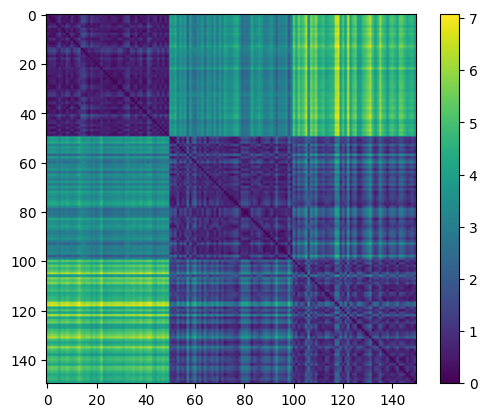

In [9]:
distMatrix = dist_matrix(data_np, 2)

plt.imshow(distMatrix)
plt.colorbar()
plt.show()

Your answer here:

3. There are at least $150^2$ distance computations in order to populate every value of the distance matrix
4. The values in the distance matrix generally increase as i and j (matrix indexes) increase because we start to compare data of two different classes

## Question 2: K-Nearest Neighbors Classifier
The K-Nearest Neighbors Classifier is one of the most popular instance-based (and in general) classification models. In this question, we will implement our own version and test in different scenarios.

### Question 2a: Implement the K-NN Classifier
For the implementation, your function should have the format:
```python
def knnclassify(test_data,training_data, training_labels, K=1):
```
where 'test_data' contains test data points, 'training_data' contains training data points, 'training_labels' holds the training labels, and 'K' is the number of neighbors. 

The output of this function should be 'pred_labels' which contains the predicted label for each test data point (it should, therefore, have the same number of rows as 'test_data').


The piece of code below prepares the Iris dataset by converting the labels from strings to integers (which is quite easier to move around and do calculations with):

In [10]:
all_vals = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
all_labels = data['label'].values
unique_labels = np.unique(all_labels)
#change string labels to numbers
new_labels = np.zeros(len(all_labels)) #np array of length 3
for i in range(0, len(unique_labels)):
    new_labels[all_labels == unique_labels[i]] = i
all_labels = new_labels

In [16]:
def knnclassify(test_data, training_data, training_labels, K):
	
	numTestRows = len(test_data) # Number of test data points
	
	pred_labels = np.empty([numTestRows]) # Predicted label of each test data point
 
	for testRow, i in zip(test_data, range(numTestRows)): # For each test data point
		distMatrix = np.empty([numTestRows, 150]) # Distance matrix between test (i) and training (j)
		for trainingRow, j in zip(training_data[:, :4], range(150)): # Compare to every training data point (features only)
			dist = lpDistance(testRow, trainingRow, 2) # Get dist between current test data point and all training data points
			distMatrix[i, j] = dist # Record distances
		
		# First for loop (i)
		flatDistMatrix = np.ndarray.flatten(distMatrix) # 1d array of distances
		#sortedDistMatrix = np.sort(distMatrix[i, :], axis = None) # 1D array of sorted distances
		sortedIndices = np.argsort(distMatrix[i, :], axis = None) # 1D array of sorted indices of distances
		
		# Number of each classifier in K nearest neighbors (weighted)
		numSetosa = 0.0
		numVersicolor = 0.0
		numVirginica = 0.0


		for index in sortedIndices[:K] :
			if(index >= 0 and index < 50) :
				if(flatDistMatrix[index] == 0) : # Avoid divide by 0
					numSetosa += float('inf')
				else :
					numSetosa += (1.0/flatDistMatrix[index])
				numSetosa += 1
			elif(index >= 50 and index < 100) :
				if(flatDistMatrix[index] == 0) : # Avoid divide by 0
					numVersicolor += float('inf')
				else :
					numVersicolor += (1.0/flatDistMatrix[index])
				numVersicolor += 1
			elif(index >= 100):
				if(flatDistMatrix[index] == 0) : # Avoid divide by 0
					numVersicolor += float('inf')
				else :
					numVirginica += (1.0/flatDistMatrix[index])
				numVirginica += 1
		
		if(max(numSetosa, numVersicolor, numVirginica) == numSetosa) :
			pred_labels[i] = 0
		elif(max(numSetosa, numVersicolor, numVirginica) == numVersicolor) :
			pred_labels[i] = 1
		elif(max(numSetosa, numVersicolor, numVirginica) == numVirginica) :
			pred_labels[i] = 2

	return pred_labels

print(knnclassify([[7.7, 2.8, 6.7, 2.0]], data_np, all_labels, 5))

[1.]
